# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2025/)    
## 1MS041, 2025 
&copy;2025 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

# Fundamentals of estimation

## Example 1, classification

In [1]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target

print(X.shape, y.shape)

(150, 4) (150,)


In [2]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [3]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=200)
lr.fit(X, y)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [5]:
import numpy as np
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50]))

In [6]:
y==lr.predict(X)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

## Example 2, linear regression

### Understanding Linear Regression as an Estimator

Linear regression estimates a **function** that maps inputs to outputs, unlike the mean estimator which estimates a single parameter.

**The Setup:**
- Given data $(x, y)$ with linear relationship: $y \approx \beta_0 + \beta_1 x + \epsilon$
- Goal: Estimate $g(x) = \beta_0 + \beta_1 x$ from the data

**The Process:**
1. Collect pairs of $(x, y)$ observations
2. Choose linear functions: $g(x) = \beta_0 + \beta_1 x$
3. Find best parameters by minimizing: $\sum_{i=1}^{n} (y_i - \beta_0 - \beta_1 x_i)^2$
4. Return estimator $\hat{g}(x)$ for new predictions

**Key Concepts:**
- **Empirical Risk Minimization**: Minimize prediction errors on training data
- **Function Estimation**: We're estimating an entire function, not just a parameter
- **Generalization**: The learned function should work on new, unseen data

In [8]:
def linear_regression(x,y):
    # Here x,y is our data
    from sklearn.linear_model import LinearRegression
    lr = LinearRegression()
    lr.fit(x,y)
    return lambda x1: lr.predict(x1)

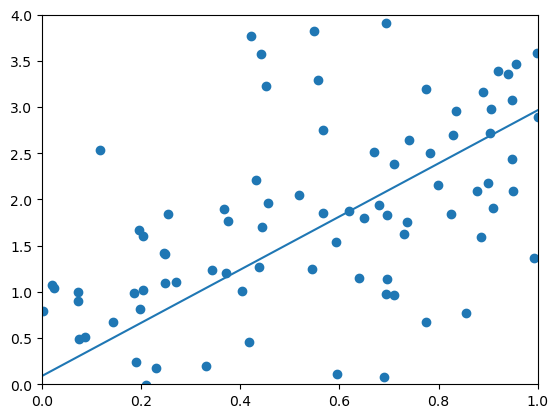

In [10]:
sample_x = np.random.uniform(0,1,size=100).reshape(-1,1)
sample_y = 3*sample_x.flatten()+np.random.normal(0,1,size=sample_x.shape[0])
g_hat = linear_regression(sample_x,sample_y)

# Lets plot out function
import matplotlib.pyplot as plt
x_plot = np.linspace(0,1,10)
plt.xlim(0,1)
plt.ylim(0,4)
plt.plot(x_plot,g_hat(x_plot.reshape(-1,1)))
plt.scatter(sample_x,sample_y)

### Repeat Experiments: $\hat{g}$ is a Random Function

The following cells repeat the estimation experiment multiple times with different datasets. This demonstrates that **$\hat{g}(x)$ is a random function** - each time we collect new data, we get a different estimated function. The variability shows the uncertainty in our estimates due to sampling randomness.

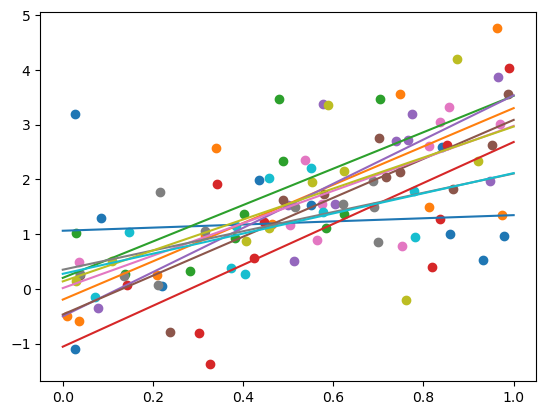

In [11]:
import matplotlib.pyplot as plt
for i in range(10):
    sample_x = np.random.uniform(0,1,size=10).reshape(-1,1)
    sample_y = 3*sample_x.flatten()+np.random.normal(0,1,size=sample_x.shape[0])
    g_hat = linear_regression(sample_x,sample_y)

    # Lets plot out function
    plt.scatter(sample_x,sample_y)
    x_plot = np.linspace(0,1,10)
    plt.plot(x_plot,g_hat(x_plot.reshape(-1,1)))

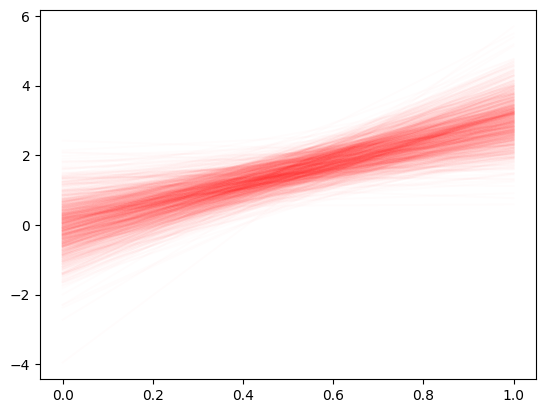

In [22]:
import matplotlib.pyplot as plt
for i in range(1000):
    sample_x = np.random.uniform(0,1,size=10).reshape(-1,1)
    sample_y = 3*sample_x.flatten()+np.random.normal(0,1,size=sample_x.shape[0])
    g_hat = linear_regression(sample_x,sample_y)

    # Lets plot out function
    #plt.scatter(sample_x,sample_y,alpha=0.1,color='blue')
    x_plot = np.linspace(0,1,10)
    plt.plot(x_plot,g_hat(x_plot.reshape(-1,1)),alpha=0.01,color='red')

## Example, testing error

In [12]:
def gen_data(n_samples):
    sample_x = np.random.uniform(0,1,size=n_samples).reshape(-1,1)
    sample_y = 3*sample_x.flatten()+np.random.normal(0,1,size=sample_x.shape[0])
    return sample_x,sample_y

In [13]:
xtrain,ytrain = gen_data(10)
g_hat = linear_regression(xtrain,ytrain)

In [14]:
def test_error():
    xtest,ytest = gen_data(100)
    predictions = g_hat(xtest)
    residual = ytest-predictions
    return np.mean(residual**2)

(array([ 3.,  9., 20., 16., 15., 12., 13.,  6.,  5.,  1.]),
 array([0.76191767, 0.83514762, 0.90837757, 0.98160752, 1.05483747,
        1.12806742, 1.20129737, 1.27452732, 1.34775728, 1.42098723,
        1.49421718]),
 <BarContainer object of 10 artists>)

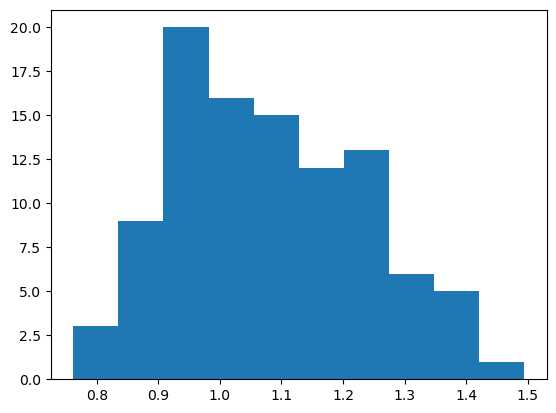

In [15]:
plt.hist([test_error() for i in range(100)])

# Another example with testing error

In [16]:

from sklearn.datasets import load_iris
data = load_iris()


In [17]:
help(load_iris)

Help on function load_iris in module sklearn.datasets._base:

load_iris(*, return_X_y=False, as_frame=False)
    Load and return the iris dataset (classification).

    The iris dataset is a classic and very easy multi-class classification
    dataset.

    =================   ==============
    Classes                          3
    Samples per class               50
    Samples total                  150
    Dimensionality                   4
    Features            real, positive
    =================   ==============

    Read more in the :ref:`User Guide <iris_dataset>`.

    .. versionchanged:: 0.20
        Fixed two wrong data points according to Fisher's paper.
        The new version is the same as in R, but not as in the UCI
        Machine Learning Repository.

    Parameters
    ----------
    return_X_y : bool, default=False
        If True, returns ``(data, target)`` instead of a Bunch object. See
        below for more information about the `data` and `target` object.

 

In [18]:
X = data['data']
Y = data['target']

In [19]:
X.shape
# 150 samples, 4 features

X_train = X[:100,:] # First 100 samples as training data
Y_train = Y[:100]
X_test = X[100:,:]  # Remaining samples as test data
Y_test = Y[100:]

In [20]:
# Now we need a learning machine
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train) # This minimizes an empirical risk over the training data

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [21]:
import numpy as np
g_hat = lambda x: lr.predict(x) # Our learned function

# At this point in time the training data is given and as such g_hat is considered fixed and not random

# We can now evaluate the performance of g_hat on the test data

predictions = g_hat(X_test)
loss01 = np.mean(predictions != Y_test) # 0-1 loss
loss01

np.float64(1.0)

In [22]:
training_predictions = g_hat(X_train)
training_loss01 = np.mean(training_predictions != Y_train)
training_loss01

np.float64(0.0)

In [23]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## The Problem with Ordered Data: Violating the IID Assumption

The previous example demonstrates a **critical mistake**: using ordered data without randomization, violating the **IID assumption** (Independent and Identically Distributed).

### What Went Wrong?
The Iris dataset is ordered by species (0-49: *Setosa*, 50-99: *Versicolor*, 100-149: *Virginica*).

Our naive split:
- **Training**: First 100 samples (only *Setosa* and *Versicolor*)
- **Test**: Last 50 samples (only *Virginica*)

### Why This Is Problematic:
- **Distribution mismatch**: Training and test sets have different class distributions
- **Impossible task**: Model never sees *Virginica* during training
- **Misleading results**: High test error doesn't reflect real performance

### The Solution:
**Randomly shuffle the data** before splitting to maintain the IID assumption.

In [24]:
# Attempt 2
# We begin by shuffling the data
indices = np.arange(X.shape[0])
np.random.shuffle(indices)
X_shuffled = X[indices,:]
Y_shuffled = Y[indices]
X_train = X_shuffled[:100,:] # First 100 samples as training data
Y_train = Y_shuffled[:100]
X_test = X_shuffled[100:,:]  # Remaining samples as test data
Y_test = Y_shuffled[100:]
lr = LogisticRegression(max_iter=200)
lr.fit(X_train,Y_train) # This minimizes an empirical risk over the training data
g_hat = lambda x: lr.predict(x) # Our learned function
predictions = g_hat(X_test)
loss01 = np.mean(predictions != Y_test) # 0-1 loss
loss01

np.float64(0.04)

In [17]:
training_predictions = g_hat(X_train)
training_loss01 = np.mean(training_predictions != Y_train)
training_loss01

np.float64(0.03)

# Comprehensive example

## Iris Dataset: A Complete Machine Learning Example

The Iris dataset contains measurements of 150 iris flowers from three species: *Setosa*, *Versicolor*, and *Virginica*. Each flower has four features: sepal length/width and petal length/width.

This example demonstrates a complete machine learning workflow:

### Part 1: Data Exploration
- Load dataset and examine basic statistics
- Visualize feature relationships with scatter plots
- Analyze correlations between variables

### Part 2: Classification with Logistic Regression
- Split data into training/test sets with proper randomization
- Scale features for optimal performance
- Train logistic regression classifier
- Evaluate using accuracy, confusion matrix, and feature importance

**Expected Results**: High accuracy (>95%) with petal features being most important for classification.

This demonstrates **empirical risk minimization**: choose a model, define a loss function, minimize risk on training data, and evaluate on test data.

Iris Dataset Overview:
Dataset shape: (150, 6)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target classes: ['setosa' 'versicolor' 'virginica']

First 5 rows:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target species  
0       0  setosa  
1       0  setosa  
2       0  setosa  
3       0  setosa  
4       0  setosa  

Dataset Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333     

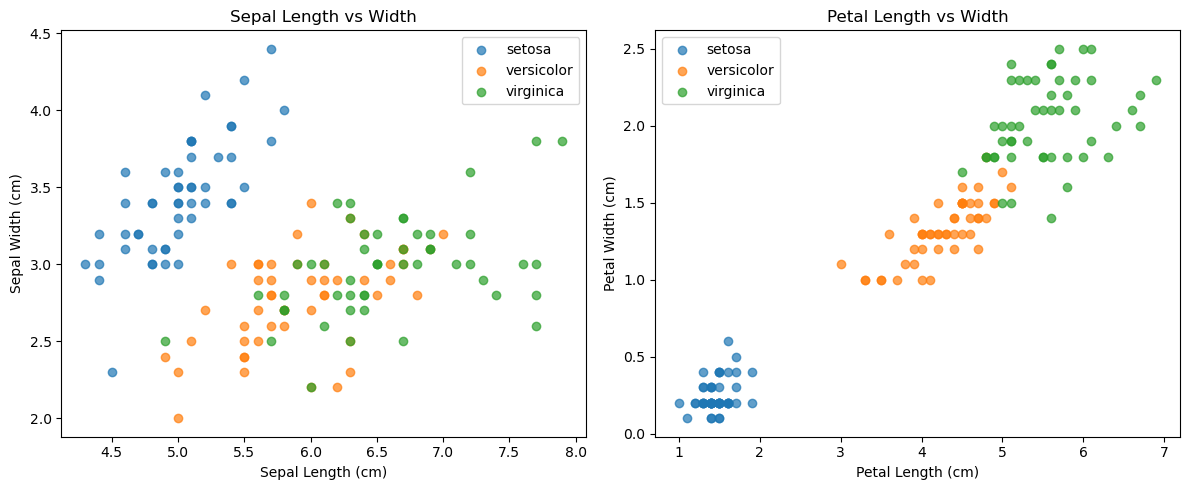

Feature Correlation Matrix:


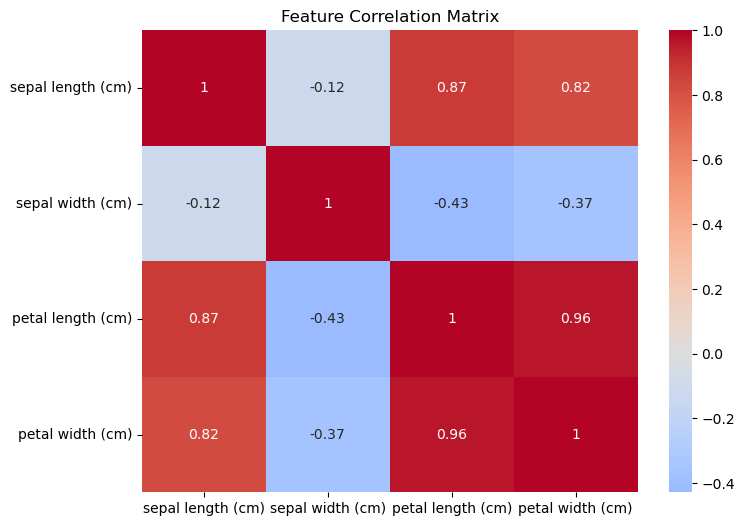

                   sepal length (cm)  sepal width (cm)  petal length (cm)  \
sepal length (cm)           1.000000         -0.117570           0.871754   
sepal width (cm)           -0.117570          1.000000          -0.428440   
petal length (cm)           0.871754         -0.428440           1.000000   
petal width (cm)            0.817941         -0.366126           0.962865   

                   petal width (cm)  
sepal length (cm)          0.817941  
sepal width (cm)          -0.366126  
petal length (cm)          0.962865  
petal width (cm)           1.000000  


In [25]:
# Comprehensive Iris Dataset Example
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the iris dataset
iris = load_iris()

# Convert to pandas DataFrame for easier manipulation
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Iris Dataset Overview:")
print("=" * 40)
print(f"Dataset shape: {df.shape}")
print(f"Features: {iris.feature_names}")
print(f"Target classes: {iris.target_names}")
print()

# Display first few rows
print("First 5 rows:")
print(df.head())
print()

# Basic statistics
print("Dataset Statistics:")
print(df.describe())
print()

# Class distribution
print("Class Distribution:")
print(df['species'].value_counts())
print()

# Create visualizations
plt.figure(figsize=(12, 5))

# Scatter plots to show relationships between features
plt.subplot(1, 2, 1)
for species in df['species'].unique():
    species_data = df[df['species'] == species]
    plt.scatter(species_data['sepal length (cm)'], species_data['sepal width (cm)'], 
                label=species, alpha=0.7)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.title('Sepal Length vs Width')

plt.subplot(1, 2, 2)
for species in df['species'].unique():
    species_data = df[df['species'] == species]
    plt.scatter(species_data['petal length (cm)'], species_data['petal width (cm)'], 
                label=species, alpha=0.7)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend()
plt.title('Petal Length vs Width')

plt.tight_layout()
plt.show()

# Correlation matrix
print("Feature Correlation Matrix:")
correlation_matrix = df[iris.feature_names].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.show()

print(correlation_matrix)

In [ ]:
# Classification Example on Iris Dataset - Logistic Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
X = iris.data  # Features
y = iris.target  # Target labels

print("Logistic Regression Classification on Iris Dataset")
print("=" * 50)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")
print()

# Scale the features (important for logistic regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and train logistic regression classifier
clf = LogisticRegression(random_state=42, max_iter=200)
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred = clf.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.4f}")
print()

# Detailed classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print()

# Visualize confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()

# Show model coefficients (feature weights)
print("Model Coefficients (Feature Weights):")
for i, feature in enumerate(iris.feature_names):
    print(f"{feature}: {clf.coef_[0][i]:.4f}")

# Visualize feature coefficients
plt.figure(figsize=(10, 6))
coefficients = clf.coef_[0]
plt.bar(iris.feature_names, coefficients, color='lightcoral')
plt.title('Logistic Regression Feature Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()